### 1. Image Data Loading Using Numpy&PyTorch

 - Color image: image have 3 color chanels


In [1]:
import urllib.request as req
from PIL import Image 
import matplotlib.pyplot as plt

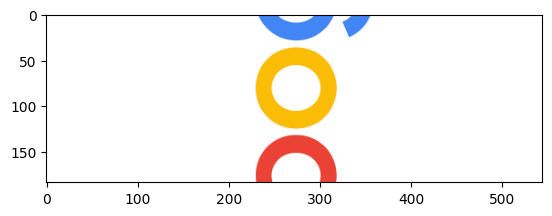

In [8]:
#download an image 
# req.urlretrieve("https://www.google.com/images/branding/googlelogo/2x/googlelogo_color_272x92dp.png", "google.png")
img = Image.open("/home/nhatthuong/Documents/ResearchVQA-VQG-firstpaper/AIO/img/google.png")
img = img.rotate(90)
plt.imshow(img)

### 2. Softmax+Normalization for Fashion-MMNIST

### 3. MLP and Example

### 4. Step by Step Implement

### 5. Training Strategy (option)